<a href="https://colab.research.google.com/github/vivianawah/Viviana/blob/main/Python_Notebook_Setup_by_Viviana_Wah_(Research_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question #2 : Is there an association between the biological mother’s year of death and in the past 12 months, whether you’ve received psychological or emotional counseling?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1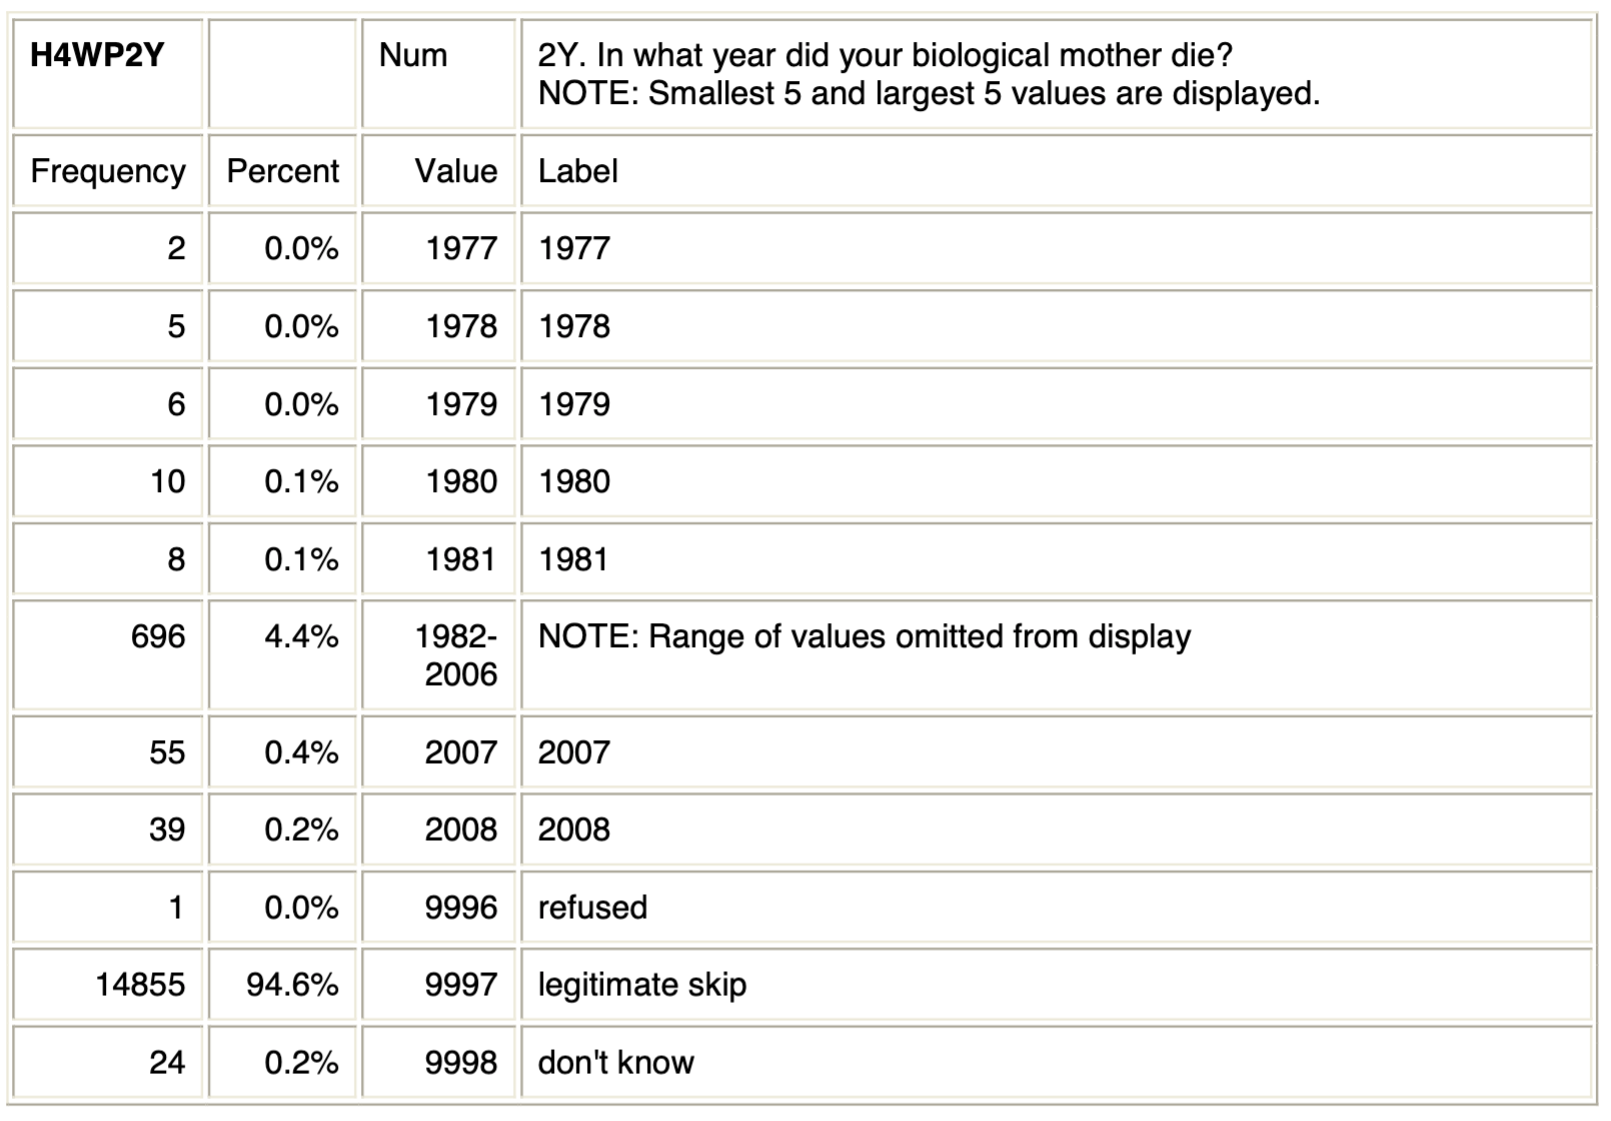

In [ ]:
df['H4WP2Y']

0           
1       2004
2           
3       9997
4           
        ... 
6499    9997
6500    1998
6501    9997
6502    9997
6503    9997
Name: H4WP2Y, Length: 6504, dtype: object

In [ ]:
df['Year_of_Death'] = df['H4WP2Y']

In [ ]:
df['Year_of_Death'].dtype

dtype('O')

In [ ]:
df['Year_of_Death'] = pd.to_numeric(df['Year_of_Death'], errors ='coerce')
df['Year_of_Death'] = df['Year_of_Death'].loc[ df['Year_of_Death'] !=' ' ]
df['Year_of_Death'] = df['Year_of_Death'].loc[ df['Year_of_Death'] < 9996 ]
df['Year_of_Death'].describe()

count     250.000000
mean     1998.508000
std         7.709193
min      1978.000000
25%      1994.000000
50%      2001.000000
75%      2005.000000
max      2008.000000
Name: Year_of_Death, dtype: float64

<Axes: xlabel='Year_of_Death', ylabel='Count'>

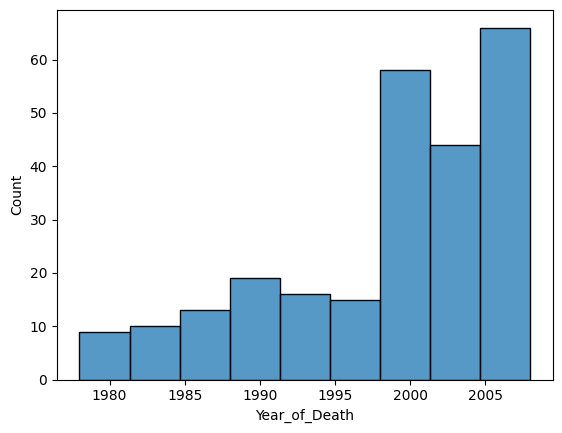

In [ ]:
sns.histplot(x ='Year_of_Death', data = df, bins = 9)

<Axes: xlabel='Year_of_Death'>

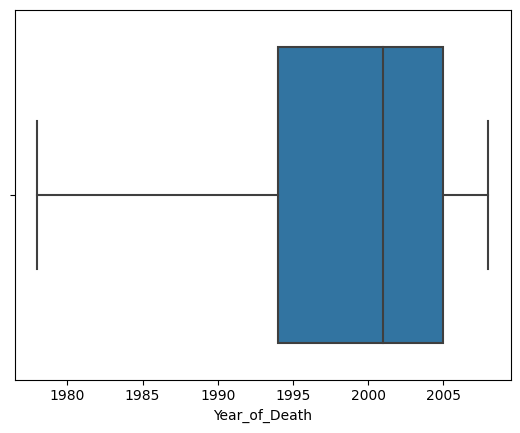

In [ ]:
sns.boxplot(x ='Year_of_Death', data = df)

Codebook 2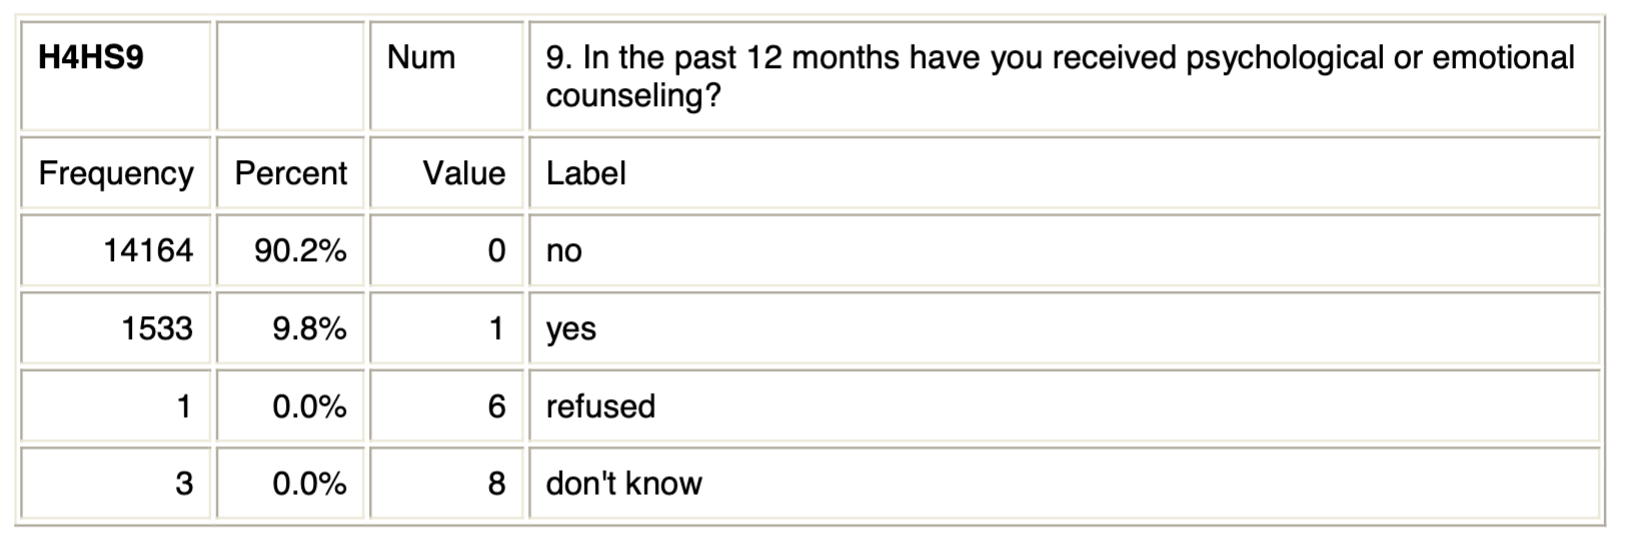

In [ ]:
df['H4HS9'].value_counts()

0    4587
     1390
1     526
8       1
Name: H4HS9, dtype: int64

In [ ]:
df['Counseling'] = df['H4HS9']
df['Counseling'].value_counts()

0    4587
     1390
1     526
8       1
Name: Counseling, dtype: int64

In [ ]:
df['Counseling'] = df['Counseling'].loc[ df['Counseling'] !=' ' ]
df['Counseling'] = df['Counseling'].loc[ df['Counseling'] !='6' ]
df['Counseling'] = df['Counseling'].loc[ df['Counseling'] !='8' ]
df['Counseling'].value_counts()

0    4587
1     526
Name: Counseling, dtype: int64

In [ ]:
df['Counseling'].replace(['0','1'] , ['NO','YES'], inplace = True)
df['Counseling'].value_counts()

NO     4587
YES     526
Name: Counseling, dtype: int64

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp

In [ ]:
rp.summary_cat(df['Counseling'])

,Variable,Outcome,Count,Percent
0,Counseling,NO,4587,89.71
1,,YES,526,10.29


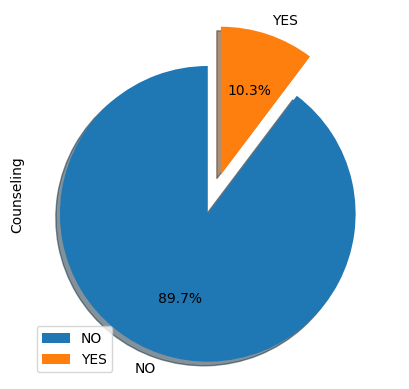

In [ ]:
explode = (0.14, 0.14)
df['Counseling'].value_counts().plot(kind ='pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=90)
plt.legend(loc ="lower left")

<Axes: title={'center': 'In the past 12 months have you received psychological or emotional counseling?'}, ylabel='Percent'>

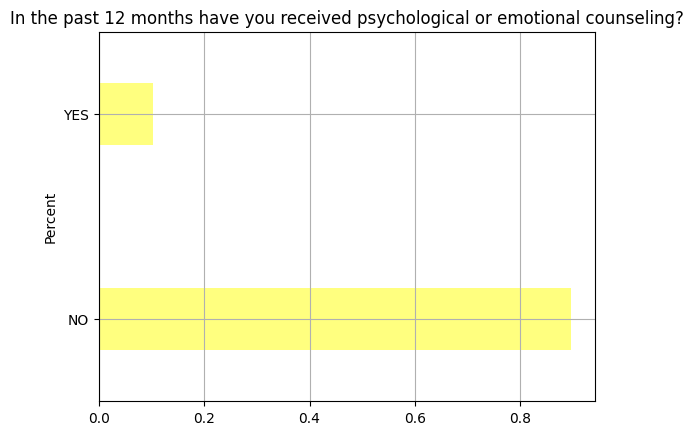

In [ ]:
plt.xlabel("Amount of Limitations")
plt.ylabel("Percent")
plt.title("In the past 12 months have you received psychological or emotional counseling?")
df['Counseling'].value_counts(normalize = True).plot(kind ='barh', color = 'yellow', width = 0.3, alpha = 0.5, grid = True)